# Spring 2022
# CPSC 585 Project 2
## Raymond Carpio
## Yu Pan
## Sijie Shang
## John Tu

# 1. As with Project 1, convert the images in TRAINING_SET, TEST_SET, and MESSAGE into two-dimensional NumPy arrays of size (# examples × # features).

In [1]:
from dataset import * # Import the entire dataset
import random # Needed to generate random numbers
import numpy as np # Needed to do NumPy functions

# Convert the input array dataset into 2-dimensional NumPy array
def convert_2d_array(input_data):
    if len(input_data) == 0:
        return None
    output_data = []
    if len(input_data[0]) == 2:
        for x, y in input_data:
            output_data.append(np.array(y))
    else:
        for x in input_data:
            output_data.append(np.array(x))
    return np.array(output_data)

def letter_list(input_data):
    if len(input_data) == 0:
        return None
    output_data = []
    if len(input_data[0]) == 2:
        for x, y in input_data:
            output_data.append(np.array(x))
    return np.array(output_data)

def show(image):
    letter_len = len(image)
    counter = 0
    # Since there are 16 characters in each row
    # and the image is 16 rows by 16 columns,
    # consider adding a newline for each current image
    # by setting the counter to 0 after printing
    # out the 16th character.
    for x in range(letter_len):
        if image[x] == 1:
            print('#', end='')
        else:
            print(' ', end='')
        counter += 1
        if counter == 16:
            counter = 0
            print('\n', end='')

TRAINING_SET_2D = convert_2d_array(TRAINING_SET)
TEST_SET_2D = convert_2d_array(TEST_SET)
MESSAGE_2D = convert_2d_array(MESSAGE)

# Verify that each 2-dimensional NumPy array contains the same number of letters and the
# same number of bitmaps as the originla arrays.
print(TRAINING_SET_2D.shape)
print(TEST_SET_2D.shape)
print(MESSAGE_2D.shape)

print("\nThe image of the first letter: \n")
show(TRAINING_SET_2D[0])

letter_list=letter_list(TRAINING_SET)
print('The letter list: ',letter_list)

(52, 256)
(26, 256)
(31, 256)

The image of the first letter: 

    ####        
    ####        
  ########      
  ########      
####    ####    
####    ####    
####    ####    
####    ####    
############    
############    
####    ####    
####    ####    
####    ####    
####    ####    
                
                
The letter list:  ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J'
 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']


# 2. Rather than training 26 different perceptrons as you did in Project 1, this time you will use a single network with 26 possible outputs.
# In order to use the character labels in TRAINING_SET and TEST_SET, convert them into integer class vectors using ord(), then into 26 one-hot encoded categorical features.

In [2]:
import tensorflow as tf # Needed to do TensorFlow operations
train_vec, test_vec = [], []

In [3]:
# Obtain all of the character labels from TRAINING_SET and TEST_SET
# and convert them into integer class vectors, followed by
# converting into one-hot encoded categorical features.
for i in range(len(TRAINING_SET)):
    train_vec.append(ord(TRAINING_SET[i][0])-ord('A'))
print(train_vec)
train_cat = tf.keras.utils.to_categorical(train_vec, num_classes=26)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


In [4]:
train_cat.shape

(52, 26)

In [5]:
train_cat

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [6]:
for j in range(len(TEST_SET)):
    test_vec.append(ord(TEST_SET[j][0])-ord('A'))
print(test_vec)
test_cat = tf.keras.utils.to_categorical(test_vec, num_classes=26)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


In [7]:
test_cat.shape

(26, 26)

In [8]:
test_cat

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 

# 3. Create a Sequential Keras model with a Dense hidden layer and a Dense output layer with softmax activation and categorical cross-entropy loss.

In [9]:
# Create a sequential model with two Dense layers:
# One as a hidden layer and the other as an output layer
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(256,)))
model.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.relu, name="Hidden_layer"))
model.add(tf.keras.layers.Dense(26, activation=tf.keras.activations.softmax, name="Output_layer"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer (Dense)        (None, 32)                8224      
                                                                 
 Output_layer (Dense)        (None, 26)                858       
                                                                 
Total params: 9,082
Trainable params: 9,082
Non-trainable params: 0
_________________________________________________________________


# 4. compile and fit the model to the training set. Train the model until the accuracy is as high as possible. You may wish to use an EarlyStopping callback.

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss=tf.keras.losses.CategoricalCrossentropy(),
             metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [11]:
callback = tf.keras.callbacks.EarlyStopping(monitor="categorical_accuracy", patience=50, restore_best_weights=False)
model.fit(x=TRAINING_SET_2D, y=train_cat, epochs=99999, verbose=2, callbacks=[callback])

Epoch 1/99999
2/2 - 0s - loss: 3.4489 - categorical_accuracy: 0.0385 - 325ms/epoch - 163ms/step
Epoch 2/99999
2/2 - 0s - loss: 3.3180 - categorical_accuracy: 0.0577 - 4ms/epoch - 2ms/step
Epoch 3/99999
2/2 - 0s - loss: 3.2216 - categorical_accuracy: 0.0962 - 4ms/epoch - 2ms/step
Epoch 4/99999
2/2 - 0s - loss: 3.1451 - categorical_accuracy: 0.1346 - 3ms/epoch - 1ms/step
Epoch 5/99999
2/2 - 0s - loss: 3.0867 - categorical_accuracy: 0.1538 - 3ms/epoch - 2ms/step
Epoch 6/99999
2/2 - 0s - loss: 3.0257 - categorical_accuracy: 0.2115 - 3ms/epoch - 2ms/step
Epoch 7/99999
2/2 - 0s - loss: 2.9731 - categorical_accuracy: 0.2115 - 4ms/epoch - 2ms/step
Epoch 8/99999
2/2 - 0s - loss: 2.9277 - categorical_accuracy: 0.2115 - 3ms/epoch - 2ms/step
Epoch 9/99999
2/2 - 0s - loss: 2.8812 - categorical_accuracy: 0.2308 - 3ms/epoch - 2ms/step
Epoch 10/99999
2/2 - 0s - loss: 2.8392 - categorical_accuracy: 0.2308 - 4ms/epoch - 2ms/step
Epoch 11/99999
2/2 - 0s - loss: 2.7985 - categorical_accuracy: 0.2885 - 3ms

2/2 - 0s - loss: 0.4691 - categorical_accuracy: 1.0000 - 3ms/epoch - 2ms/step
Epoch 90/99999
2/2 - 0s - loss: 0.4589 - categorical_accuracy: 1.0000 - 3ms/epoch - 1ms/step
Epoch 91/99999
2/2 - 0s - loss: 0.4497 - categorical_accuracy: 1.0000 - 3ms/epoch - 2ms/step
Epoch 92/99999
2/2 - 0s - loss: 0.4402 - categorical_accuracy: 1.0000 - 3ms/epoch - 1ms/step
Epoch 93/99999
2/2 - 0s - loss: 0.4311 - categorical_accuracy: 1.0000 - 2ms/epoch - 1ms/step
Epoch 94/99999
2/2 - 0s - loss: 0.4232 - categorical_accuracy: 1.0000 - 2ms/epoch - 1ms/step
Epoch 95/99999
2/2 - 0s - loss: 0.4142 - categorical_accuracy: 1.0000 - 3ms/epoch - 1ms/step
Epoch 96/99999
2/2 - 0s - loss: 0.4052 - categorical_accuracy: 1.0000 - 3ms/epoch - 2ms/step
Epoch 97/99999
2/2 - 0s - loss: 0.3975 - categorical_accuracy: 1.0000 - 3ms/epoch - 2ms/step
Epoch 98/99999
2/2 - 0s - loss: 0.3890 - categorical_accuracy: 1.0000 - 4ms/epoch - 2ms/step
Epoch 99/99999
2/2 - 0s - loss: 0.3815 - categorical_accuracy: 1.0000 - 3ms/epoch - 2

# 5. evaluate the model on TEST_SET. What accuracy do you obtain? If the accuracy is less than 100%, which test images are misclassified? (You may wish to use the show(image) function you defined in the previous project.)

In [12]:
model.evaluate(x=TEST_SET_2D, y=test_cat, verbose=1)

1/1 [==============================] - 0s 113ms/step - loss: 1.9577 - categorical_accuracy: 0.4615


[1.9576576948165894, 0.4615384638309479]

In [13]:
predicted = model.predict(TEST_SET_2D)
predicted

array([[4.57962155e-02, 1.16395526e-01, 1.02143027e-02, 2.53121499e-02,
        1.46460179e-02, 5.12883940e-04, 5.07182896e-01, 1.21274078e-02,
        1.75571125e-02, 5.07955148e-04, 5.93203993e-04, 8.13959241e-02,
        8.42021778e-03, 4.94308397e-03, 1.18948650e-02, 5.66664431e-03,
        2.50583352e-03, 1.00880787e-01, 9.35576973e-04, 2.87757255e-03,
        6.30665291e-03, 7.43914643e-05, 9.38219018e-04, 3.71220929e-04,
        1.61492487e-03, 2.03284062e-02],
       [2.78142025e-03, 4.48902130e-01, 6.62311260e-03, 5.48501674e-04,
        1.22337043e-01, 1.99291250e-03, 1.26616145e-02, 1.42757362e-03,
        5.78744635e-02, 8.82589491e-04, 7.46692205e-03, 3.22373281e-03,
        2.70746229e-03, 4.42104589e-04, 6.09944051e-04, 1.35740684e-02,
        1.29720444e-04, 2.54259072e-02, 5.06526034e-04, 2.69179363e-02,
        1.86799938e-04, 3.18633283e-05, 1.03688209e-04, 1.38401589e-03,
        7.24144187e-03, 2.54016519e-01],
       [3.15506421e-02, 1.04982927e-01, 1.45304397e-01

In [14]:
# Print out the actual and predicted letters from TEST_SET_2D.
result_list = []
for num in range(len(predicted)):
    max_val = 0
    actual = chr(num+ord('A'))
    max_val = predicted[num].argmax() # Return the index that contains the largest value.
    predict = chr(int(max_val)+ord('A'))
    result_list.append([actual, predict])
result_list

[['A', 'G'],
 ['B', 'B'],
 ['C', 'G'],
 ['D', 'B'],
 ['E', 'E'],
 ['F', 'F'],
 ['G', 'G'],
 ['H', 'M'],
 ['I', 'I'],
 ['J', 'J'],
 ['K', 'K'],
 ['L', 'L'],
 ['M', 'K'],
 ['N', 'M'],
 ['O', 'O'],
 ['P', 'P'],
 ['Q', 'G'],
 ['R', 'R'],
 ['S', 'B'],
 ['T', 'S'],
 ['U', 'G'],
 ['V', 'L'],
 ['W', 'U'],
 ['X', 'Y'],
 ['Y', 'I'],
 ['Z', 'Z']]

In [15]:
# Verify the accuracy obtained for evaluate().
list_misclassified = []
num_total, num_correct = 26, 26
for i in range(len(result_list)):
    if result_list[i][0] != result_list[i][1]:
        num_correct -= 1
        list_misclassified.append([result_list[i][0], result_list[i][1]])
print("Number of images correctly classified: {}%".format((num_correct/num_total)*100))
if len(list_misclassified) == 0:
    print("All test images are classified correctly.")
else:
    print("Here are the list of test images that are misclassified and how they appear:")
    print("Actual    Predicted")
    for i in range(len(list_misclassified)):
        print("{}         {}".format(list_misclassified[i][0], list_misclassified[i][1]))

Number of images correctly classified: 46.15384615384615%
Here are the list of test images that are misclassified and how they appear:
Actual    Predicted
A         G
C         G
D         B
H         M
M         K
N         M
Q         G
S         B
T         S
U         G
V         L
W         U
X         Y
Y         I


In [16]:
# Use show() to display the misclassified images.
for j in range(len(list_misclassified)):
    # Subtract unicode value of current letter from uppercase A to obtain the letter's position.
    letter_train = ord(list_misclassified[j][0]) - ord('A')
    letter_test = ord(list_misclassified[j][1]) - ord('A')
    print("================================================")
    print("Expected letter:")
    show(TRAINING_SET_2D[letter_train])
    print("Predicted letter:")
    show(TEST_SET_2D[letter_test])
    print("================================================")

Expected letter:
    ####        
    ####        
  ########      
  ########      
####    ####    
####    ####    
####    ####    
####    ####    
############    
############    
####    ####    
####    ####    
####    ####    
####    ####    
                
                
Predicted letter:
      ######    
      ######    
    ##      ##  
    ##      ##  
  ##            
  ##            
  ##            
  ##            
  ##    ######  
  ##    ######  
    ##      ##  
    ##      ##  
      ########  
      ########  
                
                
Expected letter:
    ########    
    ########    
  ####    ####  
  ####    ####  
####            
####            
####            
####            
####            
####            
  ####    ####  
  ####    ####  
    ########    
    ########    
                
                
Predicted letter:
      ######    
      ######    
    ##      ##  
    ##      ##  
  ##            
  ##            
  ##        

In [17]:
# Predict how the message will appear via Keras Sequential model.
predicted_message = model.predict(MESSAGE_2D)
predicted_message

array([[8.80513433e-03, 6.94840075e-03, 2.45298799e-02, 3.46022006e-03,
        9.15288031e-02, 1.17964290e-01, 1.69864651e-02, 5.24634123e-03,
        7.83467665e-03, 1.14577293e-01, 2.92379092e-02, 4.42538038e-03,
        1.53283135e-03, 9.59579411e-05, 1.40713702e-03, 2.52897269e-03,
        1.70374941e-02, 1.87924749e-03, 1.93711683e-01, 9.52554941e-02,
        1.50200007e-02, 4.28356137e-03, 1.75854890e-03, 7.74574792e-03,
        6.38042316e-02, 1.62394300e-01],
       [3.62713933e-02, 2.10895408e-02, 1.13307601e-02, 2.61840764e-02,
        6.75748754e-03, 1.06659988e-02, 1.25159234e-01, 9.67902616e-02,
        1.48571958e-03, 3.40868108e-04, 5.57172764e-03, 1.44618684e-02,
        1.94013461e-01, 8.80643278e-02, 1.14752837e-02, 5.37421703e-02,
        3.44386417e-03, 1.35382786e-01, 7.64088472e-04, 2.12556031e-03,
        4.28436287e-02, 2.80452636e-03, 7.51823038e-02, 1.37292547e-02,
        9.08599421e-03, 1.12339016e-02],
       [1.41967612e-04, 7.41118565e-03, 1.06650812e-03

In [18]:
message_list = ""
for num in range(len(predicted_message)):
    max_val = 0
    max_val = predicted_message[num].argmax() # Return the index that contains the largest value.
    predict = chr(int(max_val)+ord('A'))
    message_list += predict
print(message_list)

SMEFIVEBOYINGWIZARBSJUMPQUICKLY


In [19]:
# Compare the predicted message with the actual message
# by measuring the accuracy between the two.
actual_message = "THEFIVEBOXINGWIZARDSJUMPQUICKLY"
list_mismatch = []
num_total, num_correct = len(actual_message), len(message_list)
for i in range(len(actual_message)):
    if message_list[i] != actual_message[i]:
        num_correct -= 1
        list_mismatch.append([actual_message[i], message_list[i]])
print("Accuracy between predicted and actual message: {}%".format((num_correct/num_total)*100))
if len(list_mismatch) == 0:
    print("The message appears to be decoded correctly.")
else:
    print("Here is the list of letters that are a mismatch between predicted and actual message:")
    print("Actual    Predicted")
    for i in range(len(list_mismatch)):
        print("{}         {}".format(list_mismatch[i][0], list_mismatch[i][1]))

Accuracy between predicted and actual message: 87.09677419354838%
Here is the list of letters that are a mismatch between predicted and actual message:
Actual    Predicted
T         S
H         M
X         Y
D         B


# 6. How does this model compare with the performance of your perceptron models in Project 1?

## A: The accuracy obtained for the Keras Sequential model ended up being different from the perceptrons model for Project 1 as there are hidden layers involved for the former, and the performance will gradually worsen as more hidden layers are added.

# 7. All of the letters in MESSAGE were likely not decoded correctly, so let’s try to improve the performance of the model by adding additional hidden layers. Add two additional hidden layers of the same size as your original hidden layer, then repeat experiments (4) and (5).

In [20]:
# Do experiments 4 and 5 again, but this time, add two more hidden layers.
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.Input(shape=(256,)))
model2.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.relu, name="Hidden_layer1"))
model2.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.relu, name="Hidden_layer2"))
model2.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.relu, name="Hidden_layer3"))
model2.add(tf.keras.layers.Dense(26, activation=tf.keras.activations.softmax, name="Output_layer"))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer1 (Dense)       (None, 32)                8224      
                                                                 
 Hidden_layer2 (Dense)       (None, 32)                1056      
                                                                 
 Hidden_layer3 (Dense)       (None, 32)                1056      
                                                                 
 Output_layer (Dense)        (None, 26)                858       
                                                                 
Total params: 11,194
Trainable params: 11,194
Non-trainable params: 0
_________________________________________________________________


In [21]:
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss=tf.keras.losses.CategoricalCrossentropy(),
             metrics=[tf.keras.metrics.CategoricalAccuracy()])
callback = tf.keras.callbacks.EarlyStopping(monitor="categorical_accuracy", patience=50, restore_best_weights=False)
model2.fit(x=TRAINING_SET_2D, y=train_cat, epochs=99999, verbose=2, callbacks=[callback])

Epoch 1/99999
2/2 - 0s - loss: 3.2637 - categorical_accuracy: 0.0385 - 266ms/epoch - 133ms/step
Epoch 2/99999
2/2 - 0s - loss: 3.2172 - categorical_accuracy: 0.0962 - 5ms/epoch - 2ms/step
Epoch 3/99999
2/2 - 0s - loss: 3.1803 - categorical_accuracy: 0.0962 - 3ms/epoch - 2ms/step
Epoch 4/99999
2/2 - 0s - loss: 3.1518 - categorical_accuracy: 0.0769 - 4ms/epoch - 2ms/step
Epoch 5/99999
2/2 - 0s - loss: 3.1257 - categorical_accuracy: 0.1154 - 3ms/epoch - 2ms/step
Epoch 6/99999
2/2 - 0s - loss: 3.1003 - categorical_accuracy: 0.1154 - 3ms/epoch - 2ms/step
Epoch 7/99999
2/2 - 0s - loss: 3.0762 - categorical_accuracy: 0.1154 - 3ms/epoch - 2ms/step
Epoch 8/99999
2/2 - 0s - loss: 3.0459 - categorical_accuracy: 0.1154 - 3ms/epoch - 1ms/step
Epoch 9/99999
2/2 - 0s - loss: 3.0196 - categorical_accuracy: 0.1154 - 4ms/epoch - 2ms/step
Epoch 10/99999
2/2 - 0s - loss: 2.9849 - categorical_accuracy: 0.1538 - 4ms/epoch - 2ms/step
Epoch 11/99999
2/2 - 0s - loss: 2.9540 - categorical_accuracy: 0.1538 - 3ms

2/2 - 0s - loss: 0.1357 - categorical_accuracy: 1.0000 - 4ms/epoch - 2ms/step
Epoch 90/99999
2/2 - 0s - loss: 0.1299 - categorical_accuracy: 1.0000 - 4ms/epoch - 2ms/step
Epoch 91/99999
2/2 - 0s - loss: 0.1276 - categorical_accuracy: 1.0000 - 3ms/epoch - 2ms/step
Epoch 92/99999
2/2 - 0s - loss: 0.1220 - categorical_accuracy: 1.0000 - 3ms/epoch - 1ms/step
Epoch 93/99999
2/2 - 0s - loss: 0.1168 - categorical_accuracy: 1.0000 - 2ms/epoch - 1ms/step
Epoch 94/99999
2/2 - 0s - loss: 0.1138 - categorical_accuracy: 1.0000 - 3ms/epoch - 1ms/step
Epoch 95/99999
2/2 - 0s - loss: 0.1092 - categorical_accuracy: 1.0000 - 3ms/epoch - 2ms/step
Epoch 96/99999
2/2 - 0s - loss: 0.1054 - categorical_accuracy: 1.0000 - 3ms/epoch - 1ms/step
Epoch 97/99999
2/2 - 0s - loss: 0.1013 - categorical_accuracy: 1.0000 - 3ms/epoch - 2ms/step
Epoch 98/99999
2/2 - 0s - loss: 0.0978 - categorical_accuracy: 1.0000 - 2ms/epoch - 1ms/step
Epoch 99/99999
2/2 - 0s - loss: 0.0948 - categorical_accuracy: 1.0000 - 3ms/epoch - 1

In [22]:
model2.evaluate(x=TEST_SET_2D, y=test_cat, verbose=1)

1/1 [==============================] - 0s 99ms/step - loss: 3.0493 - categorical_accuracy: 0.3462


[3.049349546432495, 0.3461538553237915]

In [23]:
predicted = model2.predict(TEST_SET_2D)
predicted

array([[3.54389101e-02, 3.59087922e-02, 2.38030851e-02, 8.83013054e-05,
        3.89921740e-02, 2.44219613e-04, 1.68247804e-01, 2.56465049e-03,
        1.21479388e-06, 4.18645534e-04, 5.61349792e-04, 1.46704987e-01,
        2.53102946e-04, 3.92360426e-03, 6.92489445e-02, 2.49486880e-06,
        1.62511511e-04, 1.18834410e-04, 2.30849022e-04, 1.56575588e-05,
        8.56121551e-05, 5.38697746e-03, 4.66835380e-01, 4.19443211e-04,
        5.07606183e-06, 3.37357691e-04],
       [2.35362859e-06, 9.38594434e-03, 3.58163239e-03, 1.39523181e-04,
        8.00664723e-03, 5.00571549e-01, 8.02069320e-04, 1.13413364e-06,
        2.96379067e-02, 2.30892678e-03, 3.93001828e-04, 1.51291752e-04,
        2.56899352e-06, 5.78165782e-06, 1.40080083e-04, 3.05245876e-01,
        5.65796290e-06, 1.13460432e-04, 8.53920123e-04, 8.44584629e-02,
        2.97527922e-08, 2.15204036e-05, 6.06978138e-05, 1.54864756e-04,
        1.11322687e-03, 5.28419577e-02],
       [2.38889377e-04, 1.47901736e-02, 4.81610119e-01

In [24]:
result_list = []
for num in range(len(predicted)):
    max_val = 0
    actual = chr(num+ord('A'))
    max_val = predicted[num].argmax() # Return the index that contains the largest value.
    predict = chr(int(max_val)+ord('A'))
    result_list.append([actual, predict])
result_list

[['A', 'W'],
 ['B', 'F'],
 ['C', 'C'],
 ['D', 'T'],
 ['E', 'F'],
 ['F', 'F'],
 ['G', 'G'],
 ['H', 'N'],
 ['I', 'I'],
 ['J', 'D'],
 ['K', 'X'],
 ['L', 'L'],
 ['M', 'X'],
 ['N', 'N'],
 ['O', 'O'],
 ['P', 'F'],
 ['Q', 'G'],
 ['R', 'P'],
 ['S', 'G'],
 ['T', 'Y'],
 ['U', 'G'],
 ['V', 'O'],
 ['W', 'N'],
 ['X', 'S'],
 ['Y', 'Y'],
 ['Z', 'Z']]

In [25]:
list_misclassified = []
num_total, num_correct = 26, 26
for i in range(len(result_list)):
    if result_list[i][0] != result_list[i][1]:
        num_correct -= 1
        list_misclassified.append([result_list[i][0], result_list[i][1]])
print("Number of images correctly classified: {}%".format((num_correct/num_total)*100))
if len(list_misclassified) == 0:
    print("All test images are classified correctly.")
else:
    print("Here are the list of test images that are misclassified and how they appear:")
    print("Actual    Predicted")
    for i in range(len(list_misclassified)):
        print("{}         {}".format(list_misclassified[i][0], list_misclassified[i][1]))

Number of images correctly classified: 34.61538461538461%
Here are the list of test images that are misclassified and how they appear:
Actual    Predicted
A         W
B         F
D         T
E         F
H         N
J         D
K         X
M         X
P         F
Q         G
R         P
S         G
T         Y
U         G
V         O
W         N
X         S


In [26]:
# Use show() to display the misclassified images.
for j in range(len(list_misclassified)):
    # Subtract unicode value of current letter from uppercase A to obtain the letter's position.
    letter_train = ord(list_misclassified[j][0]) - ord('A')
    letter_test = ord(list_misclassified[j][1]) - ord('A')
    print("================================================")
    print("Expected letter:")
    show(TRAINING_SET_2D[letter_train])
    print("Predicted letter:")
    show(TEST_SET_2D[letter_test])
    print("================================================")

Expected letter:
    ####        
    ####        
  ########      
  ########      
####    ####    
####    ####    
####    ####    
####    ####    
############    
############    
####    ####    
####    ####    
####    ####    
####    ####    
                
                
Predicted letter:
  ##          ##
  ##          ##
  ##          ##
  ##          ##
  ##          ##
  ##          ##
  ##    ##    ##
  ##    ##    ##
  ##    ##    ##
  ##    ##    ##
  ##    ##    ##
  ##    ##    ##
    ####  ####  
    ####  ####  
                
                
Expected letter:
############    
############    
  ####    ####  
  ####    ####  
  ####    ####  
  ####    ####  
  ##########    
  ##########    
  ####    ####  
  ####    ####  
  ####    ####  
  ####    ####  
############    
############    
                
                
Predicted letter:
  ############  
  ############  
    ##      ##  
    ##      ##  
    ##  ##      
    ##  ##      
    ######  

  ########      
    ####        
    ####        
                
                
Predicted letter:
      ####      
      ####      
    ##    ##    
    ##    ##    
  ##        ##  
  ##        ##  
  ##        ##  
  ##        ##  
  ##        ##  
  ##        ##  
    ##    ##    
    ##    ##    
      ####      
      ####      
                
                
Expected letter:
####      ####  
####      ####  
####      ####  
####      ####  
####      ####  
####      ####  
####  ##  ####  
####  ##  ####  
##############  
##############  
######  ######  
######  ######  
####      ####  
####      ####  
                
                
Predicted letter:
  ####      ##  
  ####      ##  
  ##  ##    ##  
  ##  ##    ##  
  ##    ##  ##  
  ##    ##  ##  
  ##      ####  
  ##      ####  
  ##        ##  
  ##        ##  
  ##        ##  
  ##        ##  
  ##        ##  
  ##        ##  
                
                
Expected letter:
####      ####  
####      ##

In [27]:
predicted_message = model2.predict(MESSAGE_2D)
predicted_message

array([[3.26371878e-06, 2.43999428e-04, 7.32421468e-05, 9.24711057e-04,
        5.12584927e-04, 1.45294867e-03, 1.17752049e-03, 3.52159577e-06,
        6.62345532e-03, 8.46040994e-03, 9.45355278e-04, 6.88487344e-05,
        1.21624305e-06, 7.32820035e-06, 4.98017354e-04, 9.86004341e-03,
        3.73866525e-03, 1.87630540e-05, 6.18676059e-02, 8.27755108e-02,
        1.48680720e-05, 1.35409180e-03, 7.74364344e-06, 3.54631320e-02,
        7.60681808e-01, 2.32213195e-02],
       [4.21405211e-03, 2.58969865e-03, 5.90583601e-04, 3.00789852e-05,
        1.54880524e-01, 4.28789266e-04, 7.67880352e-04, 2.02361820e-03,
        1.09816267e-06, 3.14366771e-03, 1.08918756e-01, 5.64739632e-04,
        1.00275844e-01, 5.27045012e-01, 5.91238437e-04, 8.13277366e-05,
        2.18560541e-04, 5.15160896e-02, 1.84463061e-04, 3.40461565e-06,
        2.00900118e-04, 1.91272644e-03, 3.32671069e-02, 6.50847191e-03,
        5.83125529e-06, 3.53736323e-05],
       [1.72948494e-05, 7.35302782e-03, 2.07077549e-03

In [28]:
message_list = ""
for num in range(len(predicted_message)):
    max_val = 0
    max_val = predicted_message[num].argmax() # Return the index that contains the largest value.
    predict = chr(int(max_val)+ord('A'))
    message_list += predict
print(message_list)

YNEFIVFBOSINGWIZAPZSJUMPQUICKLY


In [29]:
actual_message = "THEFIVEBOXINGWIZARDSJUMPQUICKLY"
list_mismatch = []
num_total, num_correct = len(actual_message), len(message_list)
for i in range(len(actual_message)):
    if message_list[i] != actual_message[i]:
        num_correct -= 1
        list_mismatch.append([actual_message[i], message_list[i]])
print("Accuracy between predicted and actual message: {}%".format((num_correct/num_total)*100))
if len(list_mismatch) == 0:
    print("The message appears to be decoded correctly.")
else:
    print("Here is the list of letters that are a mismatch between predicted and actual message:")
    print("Actual    Predicted")
    for i in range(len(list_mismatch)):
        print("{}         {}".format(list_mismatch[i][0], list_mismatch[i][1]))

Accuracy between predicted and actual message: 80.64516129032258%
Here is the list of letters that are a mismatch between predicted and actual message:
Actual    Predicted
T         Y
H         N
E         F
X         S
R         P
D         Z


# Does the performance improve?

## A: No, the performance does not improve simply by adding additional hidden layers.

# 8. Repeat experiment (7), adding additional layers of the same size until the message is decoded correctly. What results do you observe?

In [30]:
# Do number 7 again, except add as many layers as possible until the message can be decoded correctly.
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.Input(shape=(256,)))
model3.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.relu, name="Hidden_layer1"))
model3.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.relu, name="Hidden_layer2"))
model3.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.relu, name="Hidden_layer3"))
model3.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.relu, name="Hidden_layer4"))
model3.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.relu, name="Hidden_layer5"))
model3.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.relu, name="Hidden_layer6"))
model3.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.relu, name="Hidden_layer7"))
model3.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.relu, name="Hidden_layer8"))
model3.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.relu, name="Hidden_layer9"))
model3.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.relu, name="Hidden_layer10"))
model3.add(tf.keras.layers.Dense(26, activation=tf.keras.activations.softmax, name="Output_layer"))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer1 (Dense)       (None, 32)                8224      
                                                                 
 Hidden_layer2 (Dense)       (None, 32)                1056      
                                                                 
 Hidden_layer3 (Dense)       (None, 32)                1056      
                                                                 
 Hidden_layer4 (Dense)       (None, 32)                1056      
                                                                 
 Hidden_layer5 (Dense)       (None, 32)                1056      
                                                                 
 Hidden_layer6 (Dense)       (None, 32)                1056      
                                                                 
 Hidden_layer7 (Dense)       (None, 32)               

In [31]:
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss=tf.keras.losses.CategoricalCrossentropy(),
             metrics=[tf.keras.metrics.CategoricalAccuracy()])
callback = tf.keras.callbacks.EarlyStopping(monitor="categorical_accuracy", patience=50, restore_best_weights=False)
model3.fit(x=TRAINING_SET_2D, y=train_cat, epochs=99999, verbose=2, callbacks=[callback])

Epoch 1/99999
2/2 - 1s - loss: 3.2588 - categorical_accuracy: 0.0577 - 539ms/epoch - 269ms/step
Epoch 2/99999
2/2 - 0s - loss: 3.2531 - categorical_accuracy: 0.0769 - 5ms/epoch - 3ms/step
Epoch 3/99999
2/2 - 0s - loss: 3.2485 - categorical_accuracy: 0.0577 - 4ms/epoch - 2ms/step
Epoch 4/99999
2/2 - 0s - loss: 3.2441 - categorical_accuracy: 0.0962 - 4ms/epoch - 2ms/step
Epoch 5/99999
2/2 - 0s - loss: 3.2383 - categorical_accuracy: 0.0769 - 4ms/epoch - 2ms/step
Epoch 6/99999
2/2 - 0s - loss: 3.2304 - categorical_accuracy: 0.0577 - 4ms/epoch - 2ms/step
Epoch 7/99999
2/2 - 0s - loss: 3.2229 - categorical_accuracy: 0.0577 - 5ms/epoch - 2ms/step
Epoch 8/99999
2/2 - 0s - loss: 3.2126 - categorical_accuracy: 0.0577 - 5ms/epoch - 3ms/step
Epoch 9/99999
2/2 - 0s - loss: 3.1999 - categorical_accuracy: 0.0577 - 8ms/epoch - 4ms/step
Epoch 10/99999
2/2 - 0s - loss: 3.1863 - categorical_accuracy: 0.0769 - 4ms/epoch - 2ms/step
Epoch 11/99999
2/2 - 0s - loss: 3.1693 - categorical_accuracy: 0.0769 - 11m

2/2 - 0s - loss: 0.7971 - categorical_accuracy: 0.7885 - 3ms/epoch - 2ms/step
Epoch 90/99999
2/2 - 0s - loss: 1.8085 - categorical_accuracy: 0.6923 - 4ms/epoch - 2ms/step
Epoch 91/99999
2/2 - 0s - loss: 1.6313 - categorical_accuracy: 0.5577 - 4ms/epoch - 2ms/step
Epoch 92/99999
2/2 - 0s - loss: 1.1926 - categorical_accuracy: 0.6346 - 4ms/epoch - 2ms/step
Epoch 93/99999
2/2 - 0s - loss: 0.4110 - categorical_accuracy: 0.8269 - 4ms/epoch - 2ms/step
Epoch 94/99999
2/2 - 0s - loss: 0.5492 - categorical_accuracy: 0.7692 - 3ms/epoch - 1ms/step
Epoch 95/99999
2/2 - 0s - loss: 0.4158 - categorical_accuracy: 0.7885 - 5ms/epoch - 3ms/step
Epoch 96/99999
2/2 - 0s - loss: 0.2710 - categorical_accuracy: 0.9423 - 6ms/epoch - 3ms/step
Epoch 97/99999
2/2 - 0s - loss: 0.1950 - categorical_accuracy: 0.9808 - 7ms/epoch - 3ms/step
Epoch 98/99999
2/2 - 0s - loss: 0.1531 - categorical_accuracy: 0.9808 - 4ms/epoch - 2ms/step
Epoch 99/99999
2/2 - 0s - loss: 0.2012 - categorical_accuracy: 0.9423 - 7ms/epoch - 3

In [32]:
model3.evaluate(x=TEST_SET_2D, y=test_cat, verbose=1)

1/1 [==============================] - 0s 132ms/step - loss: 6.9250 - categorical_accuracy: 0.0769


[6.925009727478027, 0.07692307978868484]

In [33]:
predicted = model3.predict(TEST_SET_2D)
predicted

array([[4.81602609e-01, 2.08660262e-03, 2.27242010e-11, 2.24404386e-04,
        1.67462963e-06, 1.98980520e-11, 1.13522572e-06, 3.40147485e-12,
        2.24859104e-01, 3.15972080e-04, 1.02816741e-10, 1.33620139e-04,
        1.09265852e-12, 4.99650099e-09, 5.27833169e-03, 6.73517742e-10,
        2.94383848e-04, 1.77002621e-05, 1.01457257e-02, 2.61632383e-01,
        2.56575561e-09, 3.95698127e-11, 8.31491946e-07, 2.15514273e-08,
        1.34056341e-02, 2.47153838e-12],
       [7.26213257e-05, 4.17654868e-03, 2.68439378e-13, 3.55660304e-04,
        6.73488099e-10, 2.65299305e-17, 1.62411382e-07, 9.51506923e-15,
        1.41433598e-02, 5.34644823e-05, 6.16538808e-15, 2.17696328e-09,
        1.07463377e-15, 1.83594429e-09, 2.83599049e-02, 6.61910956e-13,
        7.68100179e-08, 4.80028291e-07, 2.68173491e-04, 9.97831696e-04,
        6.52469900e-09, 1.43935280e-11, 6.15956087e-05, 2.86002667e-12,
        9.51510072e-01, 1.44756050e-14],
       [7.03990111e-07, 3.16475621e-06, 3.31800617e-02

In [34]:
result_list = []
for num in range(len(predicted)):
    max_val = 0
    actual = chr(num+ord('A'))
    max_val = predicted[num].argmax() # Return the index that contains the largest value.
    predict = chr(int(max_val)+ord('A'))
    result_list.append([actual, predict])
result_list

[['A', 'A'],
 ['B', 'Y'],
 ['C', 'G'],
 ['D', 'T'],
 ['E', 'X'],
 ['F', 'E'],
 ['G', 'I'],
 ['H', 'P'],
 ['I', 'I'],
 ['J', 'O'],
 ['K', 'E'],
 ['L', 'I'],
 ['M', 'K'],
 ['N', 'R'],
 ['O', 'I'],
 ['P', 'B'],
 ['Q', 'I'],
 ['R', 'B'],
 ['S', 'O'],
 ['T', 'Q'],
 ['U', 'O'],
 ['V', 'I'],
 ['W', 'Q'],
 ['X', 'Y'],
 ['Y', 'T'],
 ['Z', 'C']]

In [35]:
list_misclassified = []
num_total, num_correct = 26, 26
for i in range(len(result_list)):
    if result_list[i][0] != result_list[i][1]:
        num_correct -= 1
        list_misclassified.append([result_list[i][0], result_list[i][1]])
print("Number of images correctly classified: {}%".format((num_correct/num_total)*100))
if len(list_misclassified) == 0:
    print("All test images are classified correctly.")
else:
    print("Here are the list of test images that are misclassified and how they appear:")
    print("Actual    Predicted")
    for i in range(len(list_misclassified)):
        print("{}         {}".format(list_misclassified[i][0], list_misclassified[i][1]))

Number of images correctly classified: 7.6923076923076925%
Here are the list of test images that are misclassified and how they appear:
Actual    Predicted
B         Y
C         G
D         T
E         X
F         E
G         I
H         P
J         O
K         E
L         I
M         K
N         R
O         I
P         B
Q         I
R         B
S         O
T         Q
U         O
V         I
W         Q
X         Y
Y         T
Z         C


In [36]:
# Use show() to display the misclassified images.
for j in range(len(list_misclassified)):
    # Subtract unicode value of current letter from uppercase A to obtain the letter's position.
    letter_train = ord(list_misclassified[j][0]) - ord('A')
    letter_test = ord(list_misclassified[j][1]) - ord('A')
    print("================================================")
    print("Expected letter:")
    show(TRAINING_SET_2D[letter_train])
    print("Predicted letter:")
    show(TEST_SET_2D[letter_test])
    print("================================================")

Expected letter:
############    
############    
  ####    ####  
  ####    ####  
  ####    ####  
  ####    ####  
  ##########    
  ##########    
  ####    ####  
  ####    ####  
  ####    ####  
  ####    ####  
############    
############    
                
                
Predicted letter:
  ##          ##
  ##          ##
    ##      ##  
    ##      ##  
      ##  ##    
      ##  ##    
        ##      
        ##      
        ##      
        ##      
        ##      
        ##      
      ######    
      ######    
                
                
Expected letter:
    ########    
    ########    
  ####    ####  
  ####    ####  
####            
####            
####            
####            
####            
####            
  ####    ####  
  ####    ####  
    ########    
    ########    
                
                
Predicted letter:
      ######    
      ######    
    ##      ##  
    ##      ##  
  ##            
  ##            
  ##        

####    ####    
####    ####    
####    ####    
####    ####    
####  ######    
####  ######    
  ########      
  ########      
      ######    
      ######    
                
                
Predicted letter:
    ######      
    ######      
      ##        
      ##        
      ##        
      ##        
      ##        
      ##        
      ##        
      ##        
      ##        
      ##        
    ######      
    ######      
                
                
Expected letter:
############    
############    
  ####    ####  
  ####    ####  
  ####    ####  
  ####    ####  
  ##########    
  ##########    
  ####  ####    
  ####  ####    
  ####    ####  
  ####    ####  
######    ####  
######    ####  
                
                
Predicted letter:
  ##########    
  ##########    
    ##      ##  
    ##      ##  
    ##      ##  
    ##      ##  
    ########    
    ########    
    ##      ##  
    ##      ##  
    ##      ##  
    ##      

In [37]:
predicted_message = model3.predict(MESSAGE_2D)
predicted_message

array([[6.66152175e-07, 4.82716644e-07, 7.55167275e-04, 4.73423000e-07,
        1.80509233e-10, 1.09483688e-15, 2.88976312e-01, 1.24710894e-07,
        2.01579317e-01, 3.40706756e-05, 7.61565186e-11, 3.32278840e-04,
        5.11682849e-11, 9.25569132e-09, 8.09499696e-02, 8.68667822e-13,
        4.12830859e-01, 1.50058715e-10, 1.41860870e-08, 1.29368100e-02,
        4.29776819e-08, 3.67107350e-06, 2.02791615e-08, 1.54745800e-03,
        5.21261209e-05, 5.44099477e-09],
       [2.59414729e-11, 4.82800999e-04, 9.13633626e-17, 1.50388750e-08,
        9.85267252e-06, 4.54068686e-05, 2.78779952e-15, 5.52866686e-06,
        1.04332142e-11, 5.61936031e-05, 2.97619160e-02, 2.98509340e-15,
        4.06500697e-02, 1.38142109e-01, 8.70106417e-12, 7.88602948e-01,
        1.53245341e-18, 2.09268276e-03, 4.38595028e-11, 1.97199733e-13,
        4.18360360e-05, 1.06101972e-07, 1.66475705e-11, 1.08435277e-04,
        2.16073318e-12, 1.04513106e-07],
       [1.08208667e-04, 9.46459480e-08, 1.03192846e-16

In [38]:
message_list = ""
for num in range(len(predicted_message)):
    max_val = 0
    max_val = predicted_message[num].argmax() # Return the index that contains the largest value.
    predict = chr(int(max_val)+ord('A'))
    message_list += predict
print(message_list)

QPEFIVIBOSINGWIXABTSJUMPQUICKLY


In [39]:
actual_message = "THEFIVEBOXINGWIZARDSJUMPQUICKLY"
list_mismatch = []
num_total, num_correct = len(actual_message), len(message_list)
for i in range(len(actual_message)):
    if message_list[i] != actual_message[i]:
        num_correct -= 1
        list_mismatch.append([actual_message[i], message_list[i]])
print("Accuracy between predicted and actual message: {}%".format((num_correct/num_total)*100))
if len(list_mismatch) == 0:
    print("The message appears to be decoded correctly.")
else:
    print("Here is the list of letters that are a mismatch between predicted and actual message:")
    print("Actual    Predicted")
    for i in range(len(list_mismatch)):
        print("{}         {}".format(list_mismatch[i][0], list_mismatch[i][1]))

Accuracy between predicted and actual message: 77.41935483870968%
Here is the list of letters that are a mismatch between predicted and actual message:
Actual    Predicted
T         Q
H         P
E         I
X         S
Z         X
R         B
D         T


## A: As more hidden layers are added, the categorical accuracy obtained will gradually worsen due to the vanishing gradient. Also, no matter how many hidden layers are added, all the letters in the message will never be decoded correctly.

# 9. Load the EMNIST Letters dataset, and use plt.imshow() to verify that the image data has been loaded correctly and that the corresponding labels are correct.

In [40]:
from matplotlib import pyplot as plt # Needed to do matplotlib operations
emnist_data = np.load('emnist_letters.npz')
train_img = emnist_data['train_images']
train_label = emnist_data['train_labels']
test_img = emnist_data['test_images']
test_label = emnist_data['test_labels']
validate_img = emnist_data['validate_images']
validate_label = emnist_data['validate_labels']

# Reshape the images and convert them into float32, and divide by 255.
train_img = train_img.reshape((104000, 28, 28))
train_img = train_img.astype("float32") / 255
test_img = test_img.reshape((20800, 28, 28))
test_img = test_img.astype("float32") / 255
validate_img = validate_img.reshape((20800, 28, 28))
validate_img = validate_img.astype("float32") / 255

In [41]:
print(emnist_data)
print(train_img.shape)
print(train_label.shape)
print(test_img.shape)
print(test_label.shape)
print(validate_img.shape)
print(validate_label.shape)

(104000, 28, 28)
(104000, 27)
(20800, 28, 28)
(20800, 27)
(20800, 28, 28)
(20800, 27)


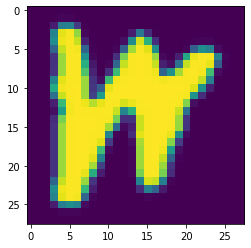

In [42]:
# Print out the first 3 letters.
plt.imshow(train_img[0])

In [43]:
print(chr(np.argmax(train_label[0])-1+ord('A')))

W


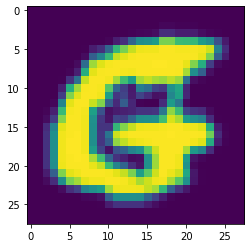

In [44]:
plt.imshow(train_img[1])

In [45]:
print(chr(np.argmax(train_label[1])-1+ord('A')))

G


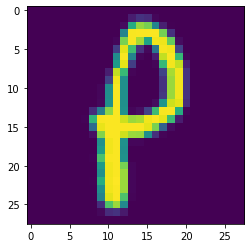

In [46]:
plt.imshow(train_img[2])

In [47]:
print(chr(np.argmax(train_label[2])-1+ord('A')))

P


# 10. Apply the network architecture from Chollet’s MNIST notebook to the EMNIST Letters data. (You will need to modify the numbers of inputs and outputs, but should leave the dense layer intact.)

In [48]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dense(27, activation="softmax")
])

In [49]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [50]:
model.fit(train_img, train_label, epochs=5, batch_size=128)

Epoch 1/5
813/813 [==============================] - 5s 6ms/step - loss: 2.3292 - accuracy: 0.4218
Epoch 2/5
813/813 [==============================] - 5s 6ms/step - loss: 1.4081 - accuracy: 0.5967
Epoch 3/5
813/813 [==============================] - 6s 7ms/step - loss: 1.2076 - accuracy: 0.6479
Epoch 4/5
813/813 [==============================] - 6s 7ms/step - loss: 1.1196 - accuracy: 0.6734
Epoch 5/5
813/813 [==============================] - 5s 6ms/step - loss: 1.0606 - accuracy: 0.6907


In [51]:
model.evaluate(x=test_img, y=test_label, verbose=1)

650/650 [==============================] - 1s 2ms/step - loss: 1.0451 - accuracy: 0.6977


[1.0451291799545288, 0.697692334651947]

# What accuracy do you achieve? How does this compare with the accuracy for MNIST?

## A: The accuracy obtained is 69.77%, and it is below MNIST's accuracy of 98.89%.

# 11. Keeping the same number of layers in the network (i.e. an MLP with a single hidden layer), modify the architecture to improve the accuracy. You will need to decide on an appropriate number of neurons in the hidden layer. Keep in mind that:
## a. There are 27 classes rather than 10, so you will need a larger hidden layer than the MNIST network.
## b. In addition to having more classes, EMNIST Letters mixes upper- and lowercase letters within each class, so even with enough neurons in the hidden layer, your accuracy is likely to be lower.  See the details in the EMNIST paper for the kind of performance you might reasonably expect.
## c. The Keras fit() method can take a validation_data parameter in order to evaluate metrics on the validation set.

In [52]:
model2 = keras.Sequential([
    layers.Flatten(),
    layers.Dense(1024, activation="relu"),     #doubled the dense layer 512 (acc:69%)->1024 (acc:71%)
    layers.Dense(27, activation="softmax")
])

In [53]:
model2.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [54]:
model2.fit(train_img, train_label, validation_data=(validate_img, validate_label), epochs=5, batch_size=128)

Epoch 1/5
813/813 [==============================] - 11s 13ms/step - loss: 2.1145 - accuracy: 0.4599 - val_loss: 1.4403 - val_accuracy: 0.5928
Epoch 2/5
813/813 [==============================] - 11s 14ms/step - loss: 1.2845 - accuracy: 0.6277 - val_loss: 1.1876 - val_accuracy: 0.6549
Epoch 3/5
813/813 [==============================] - 11s 13ms/step - loss: 1.1330 - accuracy: 0.6692 - val_loss: 1.0919 - val_accuracy: 0.6851
Epoch 4/5
813/813 [==============================] - 11s 13ms/step - loss: 1.0523 - accuracy: 0.6926 - val_loss: 1.0203 - val_accuracy: 0.7040
Epoch 5/5
813/813 [==============================] - 11s 13ms/step - loss: 0.9820 - accuracy: 0.7146 - val_loss: 0.9543 - val_accuracy: 0.7229


In [55]:
model2.evaluate(test_img, test_label, verbose=1)

650/650 [==============================] - 2s 3ms/step - loss: 0.9602 - accuracy: 0.7212


[0.9601578712463379, 0.7211538553237915]

## The accuracy is slightly better than the previous one, and it ended up being 72.12%.

# 12. The Keras examples include a Simple MNIST convnet. Note the accuracy obtained by that code compared to the previous example from Chollet.
# Rather than building a deeper MLP, let’s apply this architecture to the EMNIST Letters data. What accuracy do you achieve? How does this compare with the accuracy for the MNIST dataset?

In [56]:
num_classes = 27
input_shape = (28, 28, 1)

train_img = train_img.reshape(104000, 28, 28)
test_img = test_img.reshape(20800, 28, 28)

train_img_convnet = np.expand_dims(train_img, -1)
test_img_convnet = np.expand_dims(test_img, -1)

# #check
print(train_img_convnet.shape)
print(train_img_convnet[0].shape)
print(test_img_convnet.shape)
print(test_img_convnet[0].shape)

(104000, 28, 28, 1)
(28, 28, 1)
(20800, 28, 28, 1)
(28, 28, 1)


In [57]:
model3 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

In [58]:
model3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [59]:
model3.fit(train_img_convnet, train_label, epochs=5, batch_size=128, validation_split=0.1)

Epoch 1/5
732/732 [==============================] - 37s 50ms/step - loss: 2.2025 - accuracy: 0.3643 - val_loss: 1.2511 - val_accuracy: 0.6313
Epoch 2/5
732/732 [==============================] - 37s 50ms/step - loss: 1.2470 - accuracy: 0.6262 - val_loss: 0.9901 - val_accuracy: 0.7111
Epoch 3/5
732/732 [==============================] - 36s 50ms/step - loss: 1.0021 - accuracy: 0.6976 - val_loss: 0.7587 - val_accuracy: 0.7727
Epoch 4/5
732/732 [==============================] - 38s 52ms/step - loss: 0.8342 - accuracy: 0.7461 - val_loss: 0.6299 - val_accuracy: 0.8084
Epoch 5/5
732/732 [==============================] - 41s 57ms/step - loss: 0.7364 - accuracy: 0.7744 - val_loss: 0.5594 - val_accuracy: 0.8297


In [60]:
model3.evaluate(test_img_convnet, test_label, verbose=1)

650/650 [==============================] - 4s 6ms/step - loss: 0.5577 - accuracy: 0.8367


[0.5577357411384583, 0.8366826772689819]

## The accuracy obtained is 83.67%, and it is still below the accuracy for MNIST, despite being significantly better than the previous two models.

# 13. Use plt.imshow() to view some of the misclassified images and examine their labels. Describe what you think might have gone wrong.

In [61]:
# Only plt.imshow() will be used to view the misclassified images.
misclassified_images = []
for i in range(200):
    predict_image = model3.predict(test_img[i].reshape(1, 28, 28))
    predict_letter = chr(np.argmax(predict_image)-1+ord('A'))
    actual_letter = chr(np.argmax(test_label[i])-1+ord('A'))
    if predict_letter != actual_letter:
        misclassified_images.append(i)
print("List of images that appears to be misclassified:")
print(misclassified_images)

List of images that appears to be misclassified:
[3, 19, 21, 33, 36, 37, 41, 44, 47, 48, 51, 52, 57, 68, 69, 76, 80, 90, 95, 106, 111, 112, 117, 118, 119, 121, 123, 128, 132, 138, 143, 145, 157, 159, 164, 165, 170, 178, 179, 180, 184, 189, 190, 197]


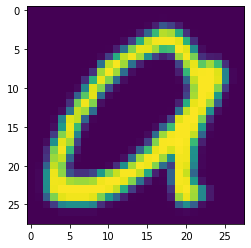

In [62]:
plt.imshow(test_img[misclassified_images[0]].reshape(28, 28))

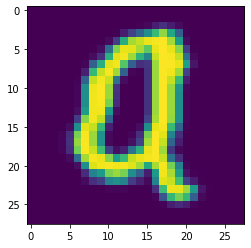

In [63]:
plt.imshow(test_img[misclassified_images[1]].reshape(28, 28))

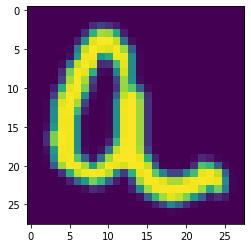

In [64]:
plt.imshow(test_img[misclassified_images[2]].reshape(28, 28))

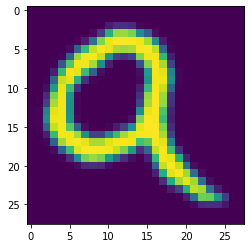

In [65]:
plt.imshow(test_img[misclassified_images[3]].reshape(28, 28))

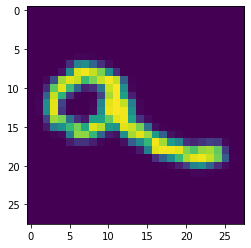

In [66]:
plt.imshow(test_img[misclassified_images[4]].reshape(28, 28))

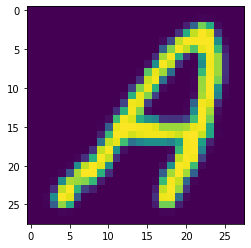

In [67]:
plt.imshow(test_img[misclassified_images[5]].reshape(28, 28))

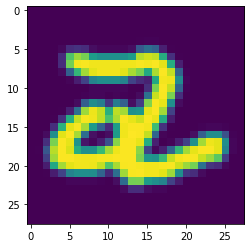

In [68]:
plt.imshow(test_img[misclassified_images[6]].reshape(28, 28))

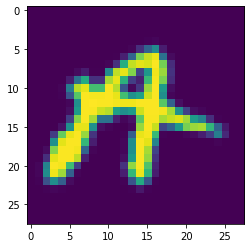

In [69]:
plt.imshow(test_img[misclassified_images[-1]].reshape(28, 28))

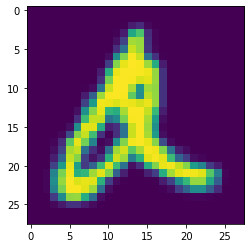

In [70]:
plt.imshow(test_img[misclassified_images[-2]].reshape(28, 28))

## A: Although the letters are the same in both the images and the labels, the images does not necessarily match the ones from the labels. It is as if the letters are being written in a different manner.